Class distribution plot saved to: /Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/generated_images/class_distribution.png


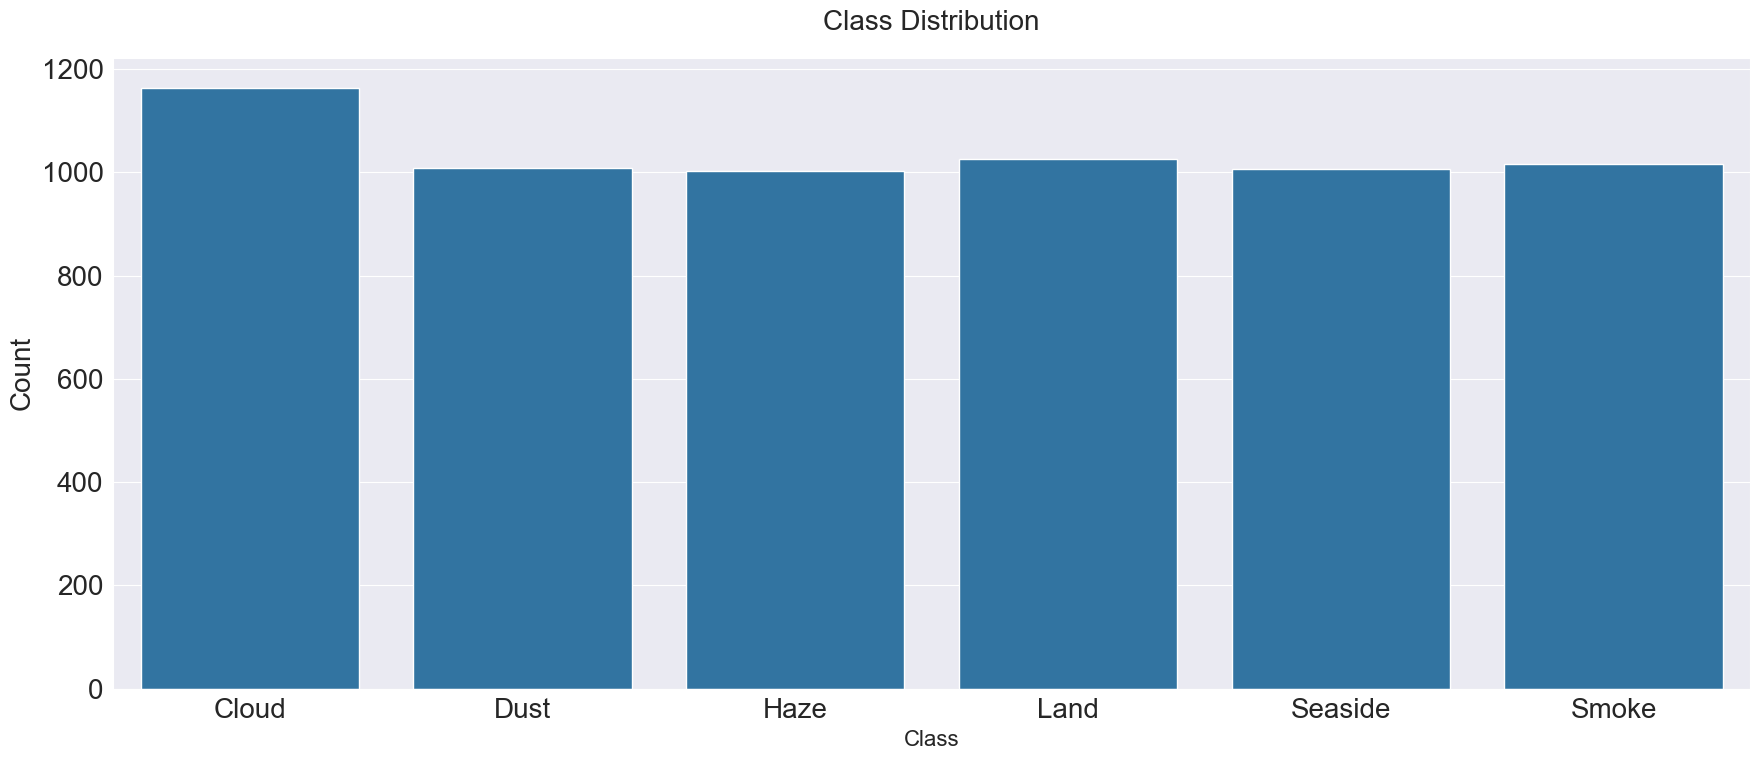

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def count_images_in_classes(path): 
    class_counts = {}
    for class_folder in os.listdir(path): 
        class_path = os.path.join(path, class_folder)
        if os.path.isdir(class_path):  # Check if it's a directory
            class_counts[class_folder] = len([f for f in os.listdir(class_path) if f.endswith('.tif')])
    
    return pd.Series(class_counts).sort_index()

path = '/Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/USTC_SmokeRS/unprocessed'
class_counts = count_images_in_classes(path)



sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(18, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, estimator=sum)
plt.title('Class Distribution', fontsize=20, pad=20)
plt.xlabel('Class', fontsize=16)
plt.ylabel('Count')

image_output_dir = '/Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/generated_images'
plot_output = os.path.join(image_output_dir, 'class_distribution.png')
plt.tight_layout()
plt.savefig(plot_output)
print(f"Class distribution plot saved to: {plot_output}")

plt.show()

In [9]:
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
input_dir = '/Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/USTC_SmokeRS/unprocessed'
output_dir = '/Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/USTC_SmokeRS/processed'

# Create main output directories
for split in ['train', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)

def process_and_split_data(input_dir, output_dir):
    all_files = []
    all_labels = []

    # Collect all file paths and labels
    for folder_name in os.listdir(input_dir):
        if folder_name.startswith('.'):  # Skip hidden files/folders
            continue

        folder_path = os.path.join(input_dir, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.tif'):
                    all_files.append(os.path.join(folder_path, file_name))
                    all_labels.append(folder_name)

    # Perform stratified split
    train_files, test_files, train_labels, test_labels = train_test_split(
        all_files, all_labels, test_size=0.2, stratify=all_labels, random_state=42
    )

    # Process and save files
    for split, files, labels in [('train', train_files, train_labels),
                                 ('test', test_files, test_labels)]:
        for file, label in zip(files, labels):
            # Create class folder if it doesn't exist
            class_folder = os.path.join(output_dir, split, label)
            os.makedirs(class_folder, exist_ok=True)

            # Process and save image
            img = Image.open(file)
            output_file = os.path.join(class_folder, os.path.basename(file).replace('.tif', '.png'))
            img.convert("RGB").save(output_file)

    # Print dataset statistics
    print(f"Total images: {len(all_files)}")
    print(f"Training set: {len(train_files)} images")
    print(f"Test set: {len(test_files)} images")

    # Print class distribution for each split
    for split_name, labels in [('Training', train_labels), ('Test', test_labels)]:
        print(f"\n{split_name} set class distribution:")
        unique_labels = set(labels)
        for label in unique_labels:
            count = labels.count(label)
            percentage = count / len(labels) * 100
            print(f"{label}: {count} ({percentage:.2f}%)")

# Run the function
process_and_split_data(input_dir, output_dir)

Total images: 6225
Training set: 4980 images
Test set: 1245 images

Training set class distribution:
Seaside: 805 (16.16%)
Haze: 802 (16.10%)
Dust: 807 (16.20%)
Smoke: 813 (16.33%)
Cloud: 931 (18.69%)
Land: 822 (16.51%)

Test set class distribution:
Seaside: 202 (16.22%)
Haze: 200 (16.06%)
Dust: 202 (16.22%)
Smoke: 203 (16.31%)
Cloud: 233 (18.71%)
Land: 205 (16.47%)


In [10]:
datagen = ImageDataGenerator(rescale = 1./255)
train_dir = '/Users/pimpijnenburg/Desktop/Thesis/USTC_SmokeRS_dataset/data/USTC_SmokeRS/processed/train'
train = datagen.flow_from_directory(train_dir, color_mode= 'rgb')

Found 4980 images belonging to 6 classes.
